In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import cv2
import random

# My ds directory
DATADIR = "C:/Users/exman/datasets/math_symbols"
training_data = []
count_categories_elements = []
test_data = []
x_train = []
y_train = []
x_test = []
y_test = []

def create_training_data():
    categories = os.listdir(DATADIR)
    for category in categories:
        print(category)
        path = os.path.join(DATADIR, category)
        class_num = categories.index(category)
        count_categories_elements.append(0)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                training_data.append([img_array, class_num])
                count_categories_elements[class_num] += 1
            except Exception as e:
                print("Ошибка считывания изображения: ", img)

def create_test_data():
    shift = 0
    for amount in count_categories_elements:
        for i in range(shift, shift + round(amount * 0.1)):
            test_data.append([training_data[i][0], training_data[i][1]])
        del training_data[shift: shift + round(amount * 0.1)]
        shift += amount - round(amount * 0.1)
    
    
create_training_data()
create_test_data()

00.-
01.!
02.(
03.)
04.,
05.[
06.]
07.{
08.}
09.+
10.=
11.0
12.1
13.2
14.3
15.4
16.5
17.6
18.7
19.8
20.9
21.A
22.alpha
23.ascii_124
24.b
25.beta
26.C
27.cos
28.d
29.Delta
30.div
31.e
32.exists
33.f
34.forall
35.forward_slash
36.G
37.gamma
38.geq
39.gt
40.H
41.i
42.in
43.infty
44.int
45.j
46.k
47.l
48.lambda
49.ldots
50.leq
51.lim
52.log
53.lt
54.M
55.mu
56.N
57.neq
58.o
59.p
60.phi
61.pi
62.pm
63.prime
64.q
65.R
66.rightarrow
67.S
68.sigma
69.sin
70.sqrt
71.sum
72.T
73.tan
74.theta
75.times
76.u
77.v
78.w
79.X
80.y
81.z


In [2]:
random.shuffle(training_data)
random.shuffle(test_data)

In [3]:
for inp, answ in training_data:
    x_train.append(inp)
    y_train.append(answ)
    
for inp, answ in test_data:
    x_test.append(inp)
    y_test.append(answ)

In [4]:
#print(x_train.shape)
x_train = np.array(x_train).reshape(-1, 45, 45, 1)
x_test = np.array(x_test).reshape(-1, 45, 45, 1)
print(x_train.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = keras.utils.to_categorical(np.array(y_train))
y_test = keras.utils.to_categorical(np.array(y_test))

(338375, 45, 45, 1)


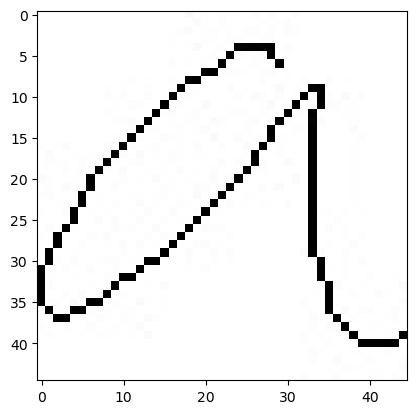

In [9]:
plt.imshow(x_train[1], cmap='gray')
plt.show()

Epoch 1/8
8460/8460 [==============================] - 58s 6ms/step - loss: 1.0040 - accuracy: 0.7445 - val_loss: 0.3133 - val_accuracy: 0.9098
Epoch 2/8
8460/8460 [==============================] - 45s 5ms/step - loss: 0.2279 - accuracy: 0.9322 - val_loss: 0.2014 - val_accuracy: 0.9339
Epoch 3/8
8460/8460 [==============================] - 48s 6ms/step - loss: 0.1544 - accuracy: 0.9524 - val_loss: 0.1580 - val_accuracy: 0.9505
Epoch 4/8
8460/8460 [==============================] - 46s 5ms/step - loss: 0.1180 - accuracy: 0.9628 - val_loss: 0.1218 - val_accuracy: 0.9612
Epoch 5/8
8460/8460 [==============================] - 46s 5ms/step - loss: 0.0945 - accuracy: 0.9697 - val_loss: 0.0994 - val_accuracy: 0.9694
Epoch 6/8
8460/8460 [==============================] - 46s 5ms/step - loss: 0.0800 - accuracy: 0.9744 - val_loss: 0.0823 - val_accuracy: 0.9749
Epoch 7/8
8460/8460 [==============================] - 47s 6ms/step - loss: 0.0693 - accuracy: 0.9775 - val_loss: 0.0742 - val_accuracy:

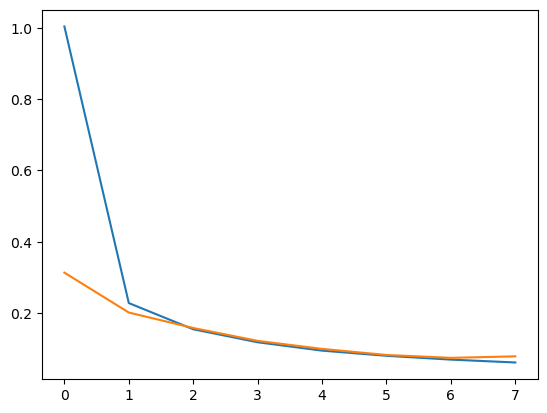

In [6]:
model = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(82, activation='softmax')
])

setSGD = keras.optimizers.SGD(momentum=0.1, nesterov=True)

model.compile(optimizer=setSGD,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

his = model.fit(x_train, y_train, batch_size=32, epochs=8, validation_split=0.2)

plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [7]:
model.evaluate(x_test, y_test)

1175/1175 [==============================] - 3s 3ms/step - loss: 0.0787 - accuracy: 0.9769


[0.07866319268941879, 0.9769408702850342]

In [8]:
model.save('model.h5')